In [115]:
import Dataset
import matplotlib.pyplot as plt 
import numpy as np 
import pickle
import os
from pathlib import Path
import glob
from scipy.ndimage import gaussian_filter

plt.style.use("~/evanstyle.mplstyle")

In [96]:
#initialize dataset 
topdir = "/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-24-23/"
d = Dataset.Dataset(topdir)

In [97]:
#load dataset raw data, parsing the files
file_prefixes = ["glitch", "ant"]
date_of_dataset = "2-24-23"
d.load_raw(file_prefixes, date_of_dataset)

#if you have event timestamps associated with glassman control script,
#you can load them in tandem with the dataset here
glassman_event_file = "/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/glassman-events/2-24-23.txt"
d.load_glassman_events(glassman_event_file)

Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-24-23/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 157


Selecting files with prefix ant
Done: found 591




In [98]:
d.create_wave_df()

Pairing by their acquisition order. Not time synchronized


  0%|          | 0/591 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/591 [00:00<?, ?it/s]

Finished filling a dataframe with 591 waveform events


Requested 1000 but only 591 have been loaded.
Plotting all events


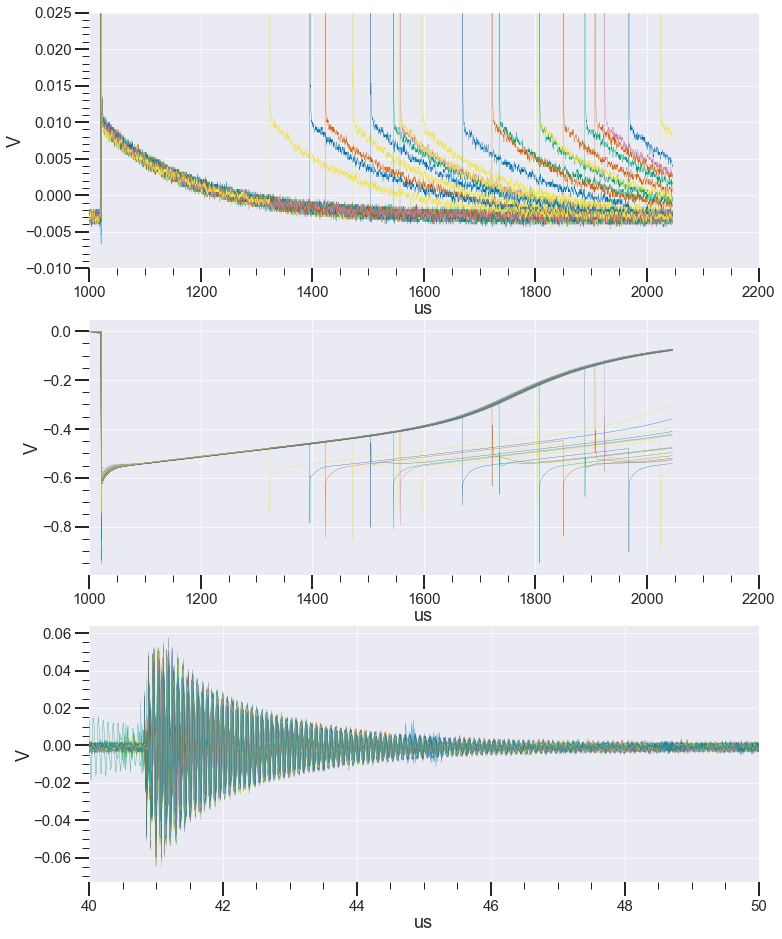

In [106]:

#get random waveforms and plot them
nev = 1000
somewaves = d.get_random_waveforms(nev)
fig, ax = plt.subplots(nrows=3, figsize=(12, 16))
for i, row in somewaves.iterrows():
    if(len(row["glitch0-data"]) > 0):
        if(row['glitchTimestamp'].hour >= 11): continue
        g_ts = np.arange(0, len(row['glitch0-data'])*row['glitchSamplingPeriod'], row['glitchSamplingPeriod'])
        ax[0].plot(g_ts, row['glitch0-data'], linewidth=0.3, label="glitch")
        ax[1].plot(g_ts, row['glitch1-data'], linewidth=0.3, label="anode")
    if(len(row["ant0-data"]) > 0):
        if(row['antTimestamp'].hour >= 11): continue
        a_ts= np.arange(0, len(row['ant0-data'])*row['antSamplingPeriod'], row['antSamplingPeriod'])
        ax[2].plot(a_ts, row['ant0-data'], linewidth=0.3, label="antenna")
#ax[0].legend()
#ax[1].legend()
#ax[2].legend()
ax[0].set_ylim([-0.01, 0.025])
ax[0].set_xlim([1000, 2200])
ax[1].set_xlim([1000, 2200])
ax[2].set_xlim([40, 50])
ax[0].set_xlabel("us")
ax[1].set_xlabel("us")
ax[2].set_xlabel("us")
ax[0].set_ylabel("V")
ax[1].set_ylabel("V")
ax[2].set_ylabel("V")
plt.show()




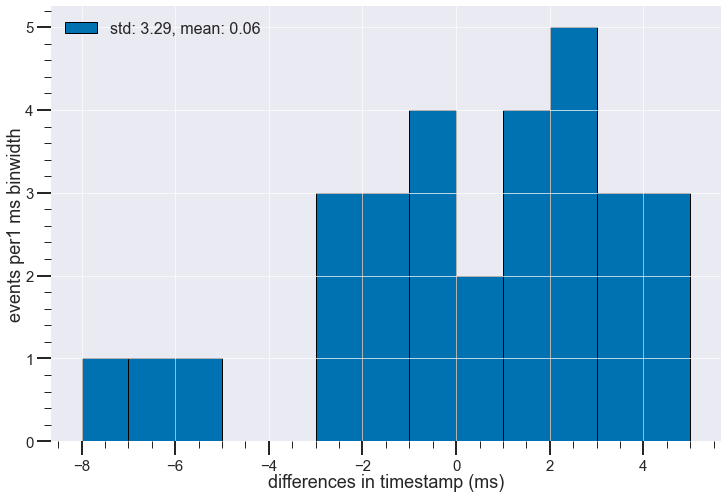

In [36]:
d.plot_timestamp_differences()
plt.show()

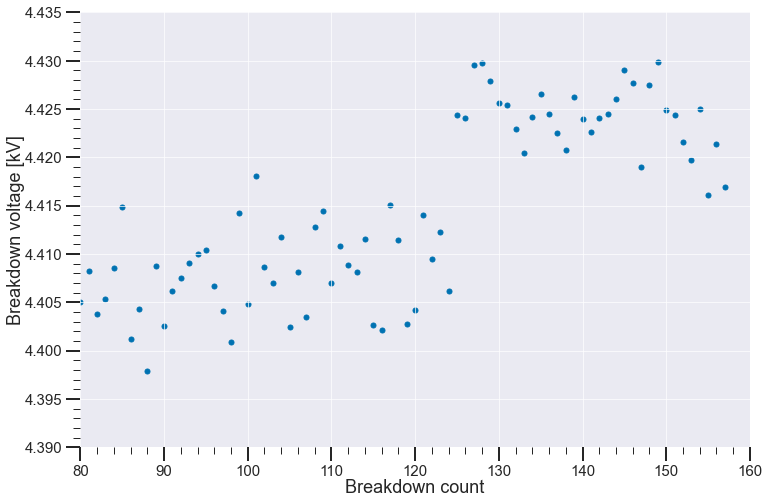

In [75]:
fig, ax = plt.subplots()
ts = d.g_events["time"]
ts_m = [(_- ts[0]).total_seconds()/60 for _ in ts]
#ax.scatter(ts, d.g_events["v_cont"], label="control voltage", s=100)
ax.scatter(range(len(ts)), d.g_events["v_cont"], label="control voltage", s=100)
ax.set_ylim([4.39, 4.435])
ax.set_xlim([80, 160])
ax.set_xlabel("Breakdown count")
ax.set_ylabel("Breakdown voltage [kV]")
plt.show()

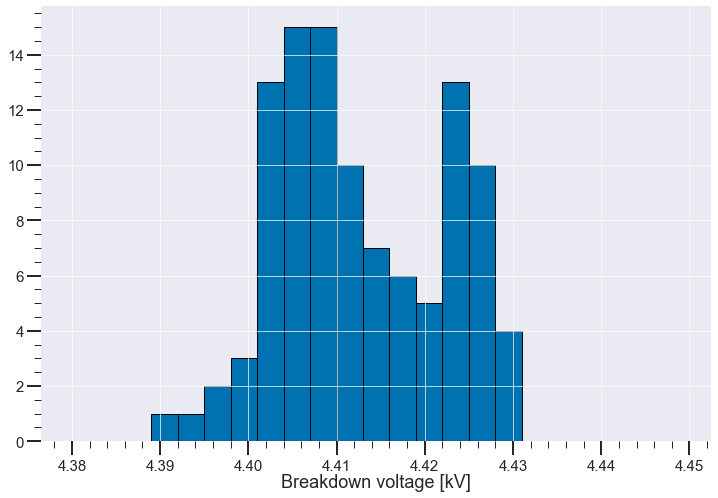

In [71]:
fig, ax = plt.subplots()
bins = np.arange(4.38, 4.45, 0.003)
ax.hist(d.g_events["v_cont"], bins=bins)
#ax.set_xlim([4.39, 4.435])
#ax.set_xlim([80, 160])
ax.set_xlabel("Breakdown voltage [kV]")
plt.show()

# A look at some preliminary prebreakdown data

['/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/565-1', '/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/567-2', '/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/569-2-100k', '/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/571-4-100k', '/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/573-4-100k']
Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/565-1/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 35


Pairing by their acquisition order. Not time synchronized


  0%|          | 0/35 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/35 [00:00<?, ?it/s]

Finished filling a dataframe with 35 waveform events
Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/567-2/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 50


Pairing by their acquisition order. Not time synchronized


  0%|          | 0/50 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/50 [00:00<?, ?it/s]

Finished filling a dataframe with 50 waveform events
Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/569-2-100k/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 49


Pairing by their acquisition order. Not time synchronized


  0%|          | 0/49 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/49 [00:00<?, ?it/s]

Finished filling a dataframe with 49 waveform events
Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/571-4-100k/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 50


Pairing by their acquisition order. Not time synchronized


  0%|          | 0/50 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/50 [00:00<?, ?it/s]

Finished filling a dataframe with 50 waveform events
Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/573-4-100k/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 50


Pairing by their acquisition order. Not time synchronized


  0%|          | 0/50 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/50 [00:00<?, ?it/s]

Finished filling a dataframe with 50 waveform events


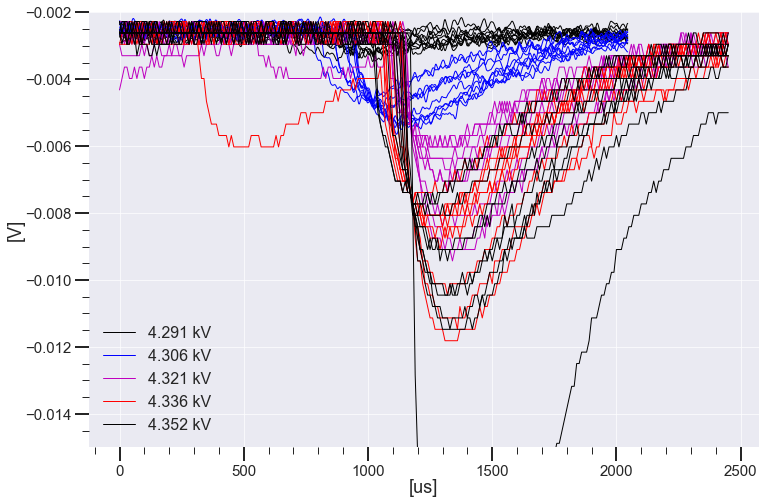

In [142]:
file_prefixes = ["glitch"]

#initialize dataset 
topdirs = glob.glob("/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/*")

#sort these in order of HV applied
topdirs = sorted(topdirs, key=lambda x:float((x.split('/')[-1]).split('-')[0]))
print(topdirs)

fig, ax = plt.subplots()
cs = ['k','b','m','r','k']
for c, td in enumerate(topdirs):
    
    tag = td.split('/')[-1]
    cont_volt = float(tag.split('-')[0]) #control voltage applied
    hv = cont_volt*0.001*7.556 + 0.022 #in kV
    d = Dataset.Dataset(td+"/")
    
    date_of_dataset = "2-28-23"
    d.load_raw(file_prefixes, date_of_dataset)
    d.create_wave_df()
    nev = 10
    somewaves = d.get_random_waveforms(nev)
    for i, row in somewaves.iterrows():
        if(len(row['glitch1-data']) !=0):
            g_ts = np.arange(0, len(row['glitch1-data'])*row['glitchSamplingPeriod'], row['glitchSamplingPeriod'])
            l = ax.plot(g_ts, gaussian_filter(row['glitch1-data'], int(5/row['glitchSamplingPeriod'])), linewidth=1, color=cs[c])
        else:
            g_ts = np.arange(0, len(row['glitch0-data'])*row['glitchSamplingPeriod'], row['glitchSamplingPeriod'])
            l = ax.plot(g_ts, gaussian_filter(row['glitch0-data'], int(5/row['glitchSamplingPeriod'])), linewidth=1, color=cs[c])

    l[0].set_label("{:.3f} kV".format(hv))

ax.legend()
ax.set_xlabel("[us]")
ax.set_ylabel("[V]")
ax.set_ylim([-0.015, -0.002])
plt.show()


['/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/565-2', '/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/567-2', '/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/569-2-100k']
Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/565-2/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 6


Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/567-2/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 2717


Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/569-2-100k/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 2986




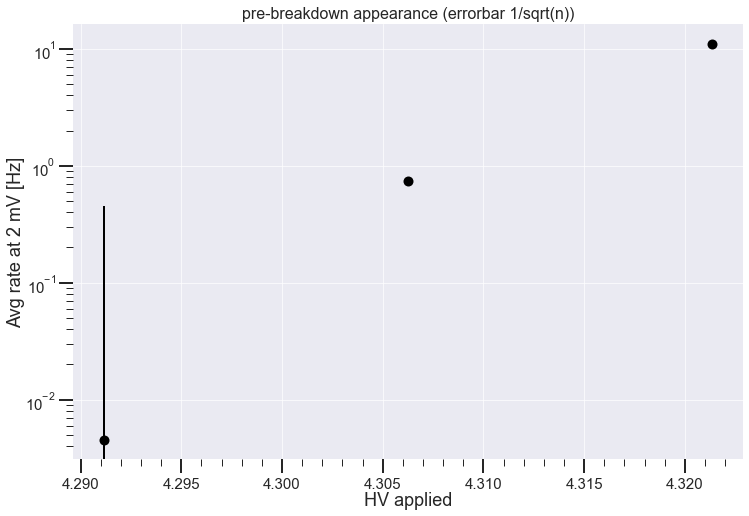

In [158]:
file_prefixes = ["glitch"]

#initialize dataset 
topdirs = glob.glob("/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-28-23/*-2*")

#sort these in order of HV applied
topdirs = sorted(topdirs, key=lambda x:float((x.split('/')[-1]).split('-')[0]))
print(topdirs)

rates = []
hvs = []
err = []
for c, td in enumerate(topdirs):
    
    tag = td.split('/')[-1]
    cont_volt = float(tag.split('-')[0]) #control voltage applied
    hv = cont_volt*0.001*7.556 + 0.022 #in kV
    hvs.append(hv)
    d = Dataset.Dataset(td+"/")
    
    date_of_dataset = "2-28-23"
    d.load_raw(file_prefixes, date_of_dataset)
    dts = d.get_event_time_differences("glitch")
    rates.append(1/np.mean(dts))
    err.append(1/np.sqrt(len(dts)))



fig, ax = plt.subplots()
ax.errorbar(hvs, rates, yerr=err, fmt='ko', markersize=10)
ax.set_xlabel("HV applied")
ax.set_ylabel("Avg rate at 2 mV [Hz]")
ax.set_title("pre-breakdown appearance (errorbar 1/sqrt(n))")
ax.set_yscale('log')
plt.show()


Looking through files in directory /Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-27-23/2-27-23-break-10M/ and grouping based on prefix


0it [00:00, ?it/s]

Selecting files with prefix glitch
Done: found 4


Pairing by their acquisition order. Not time synchronized


  0%|          | 0/4 [00:00<?, ?it/s]

Parsing waveform data from files:   0%|          | 0/4 [00:00<?, ?it/s]

Finished filling a dataframe with 4 waveform events
Requested 10 but only 4 have been loaded.
Plotting all events


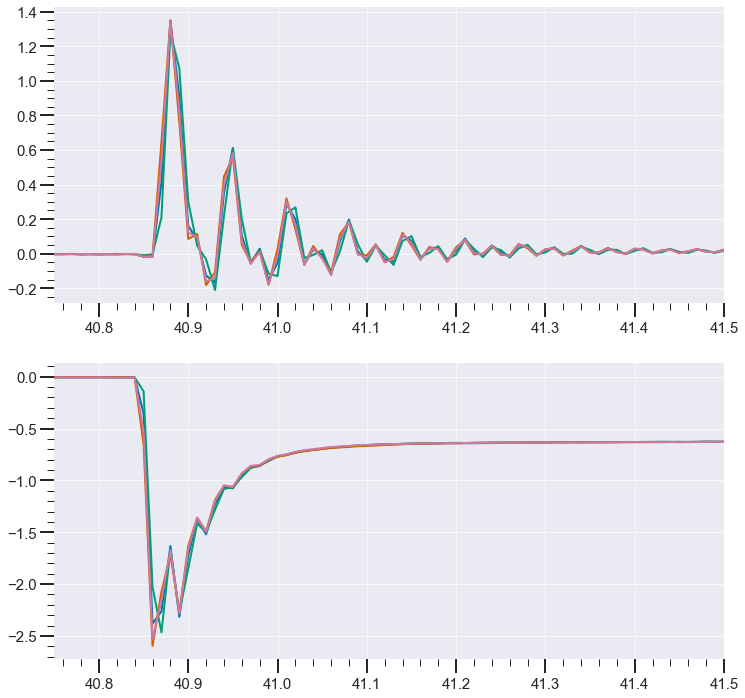

In [151]:
topdir = "/Users/ejangelico/Documents/Stanford/GasBreakdownChamber/code/data/spark-plug/2-27-23/2-27-23-break-10M/"
file_prefixes = ["glitch"]
d = Dataset.Dataset(topdir)    
date_of_dataset = "2-27-23"
d.load_raw(file_prefixes, date_of_dataset)
d.create_wave_df()
nev = 10
somewaves = d.get_random_waveforms(nev)
fig, ax = plt.subplots(nrows=2, figsize=(12, 12))
for i, row in somewaves.iterrows():
    g_ts = np.arange(0, len(row['glitch0-data'])*row['glitchSamplingPeriod'], row['glitchSamplingPeriod'])
    ax[0].plot(g_ts, row['glitch0-data'], label="glitch")
    ax[1].plot(g_ts, row['glitch1-data'], label="anode")

ax[0].set_xlim([40.75, 41.5])
ax[1].set_xlim([40.75, 41.5])
plt.show()